In [207]:
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

In [208]:
file_path = "../data/raw/IDMT-SMT-DRUMS-V2/audio/WaveDrum01_09#HH#train.wav"

/tmp/ipykernel_7379/2515803236.py:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Hmag = librosa.amplitude_to_db(H)
/tmp/ipykernel_7379/2515803236.py:7: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Pmag = librosa.amplitude_to_db(P)


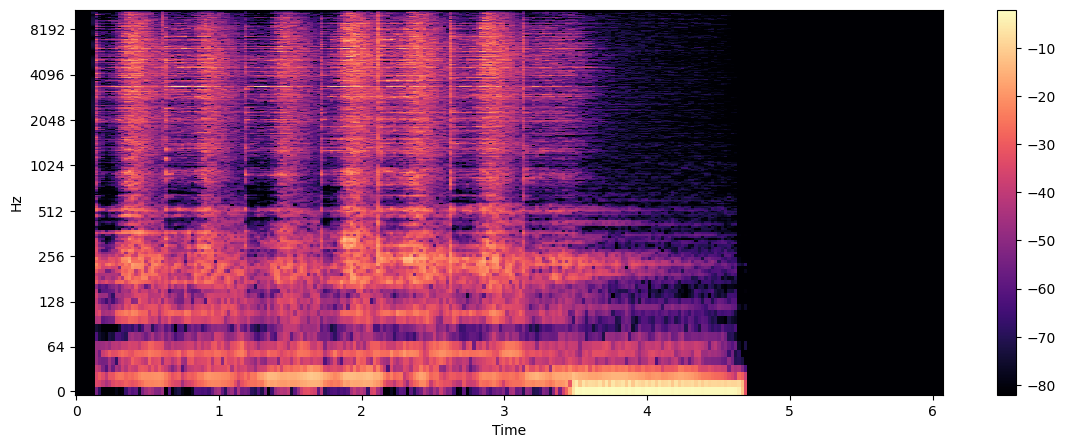

In [209]:
x, sr = librosa.load(file_path)
X = librosa.stft(x)

H, P = librosa.decompose.hpss(X)

Hmag = librosa.amplitude_to_db(H)
Pmag = librosa.amplitude_to_db(P)

librosa.display.specshow(Hmag, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
p = librosa.istft(P)

# ipd.Audio(x, rate=sr)
ipd.Audio(p, rate=sr)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1707
29
[ 0.05  0.56  1.1   1.63  2.18  2.73  3.28  3.82  4.38  4.92  5.46  6.
  6.55  7.09  7.64  8.19  8.74  9.29  9.83 10.36 10.91 11.46 12.01 12.55
 13.11 13.65 14.19 14.72 15.27]


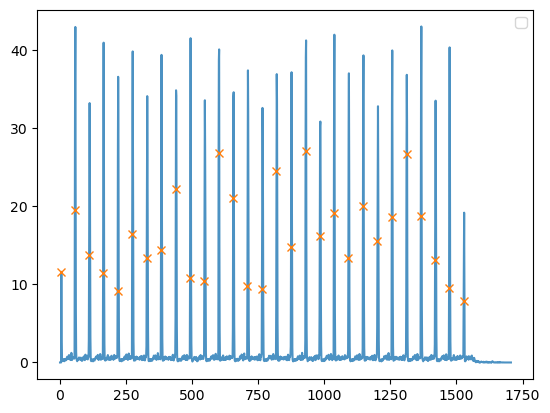

In [1]:
import librosa
import numpy as np
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

# file_path=  "../data/raw/IDMT-SMT-DRUMS-V2/audio/RealDrum01_00#MIX.wav"
# file_path="../data/raw/ENST-drums-public/drummer_1/audio/hi-hat/008_hits_pedal-hi-hat-open_pedal_x5.wav"
# file_path="../data/raw/ddm-own/per-drum/0_CC/08/CC_08_9962.m4a"
# file_path = "../data/raw/IDMT-SMT-DRUMS-V2/audio/WaveDrum02_28#MIX.wav"
# file_path="../data/raw/ENST-drums-public/drummer_1/audio/wet_mix/137_MIDI-minus-one_rock'n'roll-188_sticks.wav"
# file_path = "../data/raw/ddm-own/per-drum/0_CC/04/CC_04_9967.m4a"
# file_path = "../data/raw/ddm-own/per-drum/1_HH/16/HH_16_0038.m4a"
file_path = "../data/raw/IDMT-SMT-DRUMS-V2/audio/WaveDrum02_01#MIX.wav"

y, sr = librosa.load(file_path,sr=None)
# y = y[5*sr:15*sr]
sr=44100
o_env = librosa.onset.onset_strength(y=y, sr=sr,hop_length=441,lag=3)
print(len(o_env))
times = librosa.times_like(o_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr,hop_length=441)
onset_times = librosa.frames_to_time(onset_frames,sr=44100,hop_length=441)
print(len(onset_frames))
print(onset_times)
# import matplotlib.pyplot as plt
# D = np.abs(librosa.stft(y, hop_length=441))
# fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
#                          x_axis='time', y_axis='log', ax=ax)

plt.plot(o_env, alpha=0.8)
plt.plot(onset_frames, o_env[onset_frames], "x")
plt.legend(frameon=True, framealpha=0.8)

ipd.Audio(y,rate=sr)


In [2]:
import librosa
import numpy as np

# file_path = "../data/raw/IDMT-SMT-DRUMS-V2/audio/RealDrum01_00#MIX.wav"

y, _ = librosa.load(file_path,sr=44100)
sr=44100
print(sr)
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         hop_length=441,
                                         aggregate=np.median)
peaks = librosa.util.peak_pick(onset_env, pre_max=3, post_max=3, pre_avg=3, post_avg=3, delta=5, wait=0.5)
times = librosa.frames_to_time(peaks, hop_length=441, sr=sr)
print(peaks)
frames = peaks[(peaks < 1200)]
print(len(peaks))
print(times)
ipd.Audio(y, rate=sr)

44100
[   3   56  110  164  219  273  328  382  438  493  548  600  655  710
  766  819  875  929  984 1036 1092 1146 1201 1255 1311 1365 1419 1473
 1528]
29
[ 0.03  0.56  1.1   1.64  2.19  2.73  3.28  3.82  4.38  4.93  5.48  6.
  6.55  7.1   7.66  8.19  8.75  9.29  9.84 10.36 10.92 11.46 12.01 12.55
 13.11 13.65 14.19 14.73 15.28]


In [5]:
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

first_pos = (onset_frames[0]*441)/sr
# first_pos=1.37
# first_pos = (peaks[0]*441)/sr
print(first_pos)
trimmed = y[int(max((first_pos-0.01)*sr,0)): int(min((first_pos+0.6), (onset_frames[len(onset_frames)-1]*441)/sr-0.01)*sr)]
# trimmed = y[int(max((first_pos)*sr,0)): ]

ipd.Audio(trimmed, rate=sr)

0.05


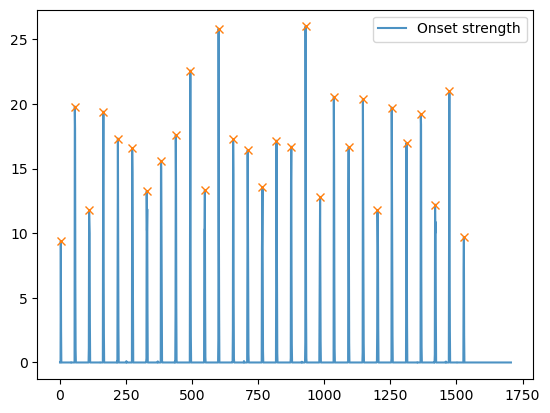

In [3]:
import matplotlib.pyplot as plt
# times = librosa.times_like(onset_env, sr=sr, hop_length=512)
# fig, ax = plt.subplots(nrows=2, sharex=True)
# D = np.abs(librosa.stft(y))
# librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
#                          y_axis='log', x_axis='time', ax=ax[1])
plt.plot(onset_env, alpha=0.8, label='Onset strength')
plt.plot(peaks, onset_env[peaks], "x")
# plt.vlines(times[peaks], 0,
#              onset_env.max(), color='r', alpha=0.8,
#              label='Selected peaks')
plt.legend(frameon=True, framealpha=0.8)
# plt.label_outer()

In [6]:
import numpy as np

predict = np.array([[0.88, 0., 0.01, 0.4],
                    [1., 0., 0., 0.11],
                    [1., 0., 0., 0.02],
                    [1., 0., 0., 0.],
                    [1., 0., 0., 0.],
                    [0., 0., 1., 0.],
                    [0.99, 0., 0.01, 0.],
                    [1., 0., 0., 0.],
                    [0.99, 0., 0.03, 0.],
                    [1., 0., 0., 0.09],
                    [1., 0., 0., 0.03],
                    [1., 0., 0., 0.],
                    [1., 0., 0., 0.],
                    [0., 0., 1., 0.01],
                    [0.91, 0., 0.12, 0.01],
                    [1., 0., 0., 0.],
                    [0.39, 0., 0.56, 0.]])

threshold = 0.5
indices_above_threshold = np.argwhere(predict > threshold)

print(indices_above_threshold)


[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 5  2]
 [ 6  0]
 [ 7  0]
 [ 8  0]
 [ 9  0]
 [10  0]
 [11  0]
 [12  0]
 [13  2]
 [14  0]
 [15  0]
 [16  2]]


In [8]:
current_row = indices_above_threshold[0, 0]
result = []
cols = []
for index in indices_above_threshold:
    row, col = index
    if row != current_row:
        tmp = [current_row, cols]
        result.append(tmp)
        current_row = row
        cols = []
    cols.append(col)
result.append([current_row, cols])
result

[[1, [0]],
 [2, [0]],
 [3, [0]],
 [4, [0]],
 [5, [0]],
 [6, [2]],
 [7, [0]],
 [8, [0]],
 [9, [0]],
 [10, [0]],
 [11, [0]],
 [12, [0]],
 [13, [0]],
 [14, [2]],
 [15, [0]],
 [16, [0]],
 [16, [2]]]

In [15]:
import pretty_midi

midi_path = '../data/raw/e-gmd-v1.0.0/drummer1/session1/1_funk_80_beat_4-4.mid'
def _get_drum_track_from_mid(midi_data):
    # Find the drum track
    drum_track = next(
        (instrument for instrument in midi_data.instruments if instrument.is_drum),
        None,
    )

    if drum_track is None:
        print("No drum track found in the MIDI file.")
        return None

    return drum_track

def get_onsets_from_mid(
        midi_path: str, start: float = 0, end: float = None
    ):
    """
    -- MID file에서 onset 읽어오기
    """
    midi_data = pretty_midi.PrettyMIDI(midi_path)
    drum_track = _get_drum_track_from_mid(midi_data)
    onset_times = [note.start for note in drum_track.notes]
    onset_times.sort()
    return onset_times

get_onsets_from_mid(midi_path)

38
38
38
44
38
38
36
46
42
36
42
42
42
38
42
36
42
38
42
42
42
38
36
42
42
38
38
42
36
42
42
38
42
42
42
42
36
42
38
42
42
36
42
38
42
42
38
42
36
42
38
42
38
42
46
36
44
42
38
42
42
42
38
42
36
42
37
42
42
36
42
38
42
42
38
42
36
42
38
42
38
42
36
42
42
38
42
42
42
38
36
42
42
38
42
36
42
42
42
38
42
42
38
42
38
42
38
37
42
38
36
42
42
42
36
36
26
44
42
42
38
42
36
42
42
38
42
42
42
36
42
42
42
38
42
36
42
38
42
42
42
42
36
42
42
38
42
36
42
38
42
42
42
42
36
42
38
42
36
46
44
42
42
38
36
42
42
38
36
42
42
37
42
36
42
42
38
42
42
38
42
36
42
38
42
37
42
36
46
44
42
38
42
36
42
38
42
36
42
38
42
38
42
42
38
42
38
42
38
38
42
42
36
42
42
38
42
36
42
42
38
38
42
38
36
42
38
42
36
42
42
37
42
38
42
42
42
38
42
38
42
36
42
42
38
38
42
36
42
42
38
38
38
42
36
42
42
38
36
42
42
37
42
42
42
38
42
42
38
42
36
42
38
42
38
42
36
46
44
42
38
42
36
42
38
42
36
42
42
38
38
42
46
36
44
38
42
42
38
42
36
42
38
42
38
42
36
46
44
42
38
42
42
42
36
42
38
42
38
42
36
46
44
42
38
42
42
38
42
36
42
38
42
3

[2.115625,
 2.1765625,
 2.4546875000000004,
 2.6140625,
 2.6281250000000003,
 2.825,
 2.9984375,
 3.0078125,
 3.1968750000000004,
 3.3703125000000003,
 3.3859375000000003,
 3.5765625,
 3.7593750000000004,
 3.7687500000000003,
 3.9359375,
 3.959375,
 4.1203125,
 4.30625,
 4.30625,
 4.4796875,
 4.65,
 4.653125,
 4.80625,
 4.821875,
 5.0125,
 5.04375,
 5.203125,
 5.203125,
 5.3828125,
 5.409375000000001,
 5.581250000000001,
 5.7718750000000005,
 5.776562500000001,
 5.971875000000001,
 6.1578125,
 6.3484375,
 6.359375,
 6.5453125000000005,
 6.73125,
 6.7515625,
 6.940625000000001,
 6.9593750000000005,
 7.112500000000001,
 7.2890625,
 7.29375,
 7.4859375,
 7.6546875000000005,
 7.665625,
 7.8328125,
 7.853125,
 8.015625,
 8.040625,
 8.203125,
 8.2171875,
 8.4203125,
 8.421875,
 8.5890625,
 8.61875,
 8.7984375,
 8.7984375,
 8.990625,
 9.1625,
 9.1828125,
 9.3515625,
 9.3546875,
 9.5375,
 9.7203125,
 9.732812500000001,
 9.925,
 9.9484375,
 10.100000000000001,
 10.2921875,
 10.293750000000001,


In [22]:
import pretty_midi

def get_instrument_onsets_midi(midi_file_path):
    # Load MIDI file using pretty_midi
    midi_data = pretty_midi.PrettyMIDI(midi_file_path)

    # Find the drum track
    drum_track = next((instrument for instrument in midi_data.instruments if instrument.is_drum), None)

    if drum_track is None:
        print("No drum track found in the MIDI file.")
        return None

    # Define selected drum instruments (hi-hat, small tom, snare, kick)
    midi_drum = {
        'HH': [42],
        'ST': [48, 50],
        'SD': [38, 40],
        'KK': [35, 36],
    }

    # Dictionary to store onsets for each selected drum instrument
    drum_onsets = {instrument: [] for instrument in midi_drum}

    # 악기의 노트를 순회하며 onset을 찾음
    for note in drum_track.notes:
        for drum, numbers in midi_drum.items():
            if note.pitch in numbers:
                drum_onsets[drum].append(note.start)

    return drum_onsets

# Example usage
midi_file_path = '../data/raw/e-gmd-v1.0.0/drummer1/session2/3_latin-chacarera_118_beat_4-4.mid'
selected_drum_onsets = get_instrument_onsets_midi(midi_file_path)

# Print onsets for each selected drum instrument
for instrument, onsets in selected_drum_onsets.items():
    print(f"Instrument {instrument} onsets: {onsets}")


Instrument HH onsets: [0.48516989583333336, 0.6355937500000001, 0.8252125520833334, 1.00106015625, 1.1853823437500002, 1.360170625, 1.5148317708333334, 1.6843234375, 1.8569930729166668, 2.0180101562500004, 2.187501822916667, 2.3485189062500003, 2.5360190625000003, 2.692798854166667, 2.867587135416667, 3.0349601562500004, 4.7563598958333335, 4.914199010416667, 5.087927968750001, 5.25953828125, 5.422674010416667, 5.5858097395833335, 5.748945468750001, 5.92373375, 6.091106770833334, 6.259539114583334, 6.414200260416667, 6.579454635416667, 6.735175104166667, 6.909963385416667, 7.065683854166667, 7.235175520833334, 8.625007187500001, 8.775431041666668, 9.137719479166668, 9.310389114583334, 9.46081296875, 9.634541927083333, 9.796618333333335, 10.139838958333334, 10.313567916666667, 10.460813802083335, 10.643017343750001, 10.808271718750001, 11.148314375, 12.857002239583334, 13.206578802083333, 13.53496890625, 13.715053802083334, 13.878189531250001, 14.046621875000001, 14.218232187500002, 14.

In [6]:
# 데이터 자르기
import librosa 

audio_path = "../data/raw/drum-kit-sound/overheads/Overhead Sample 1.wav"
audio, _ = librosa.load(audio_path,sr=44100)
audio = audio[int(0.02*44100):]

In [7]:
import os
import scipy

root_path="../data/test"
name="drum_kit_test"
os.makedirs(root_path, exist_ok=True)
scipy.io.wavfile.write(f"{root_path}/{name}.wav", 44100, audio)

In [13]:
temp = [{'x':[], 'y':[]} for _ in range(6)]
temp[0]['x'].append(1)
temp[3]['y'].append(2)
temp

[{'x': [1], 'y': []},
 {'x': [], 'y': []},
 {'x': [], 'y': []},
 {'x': [], 'y': [2]},
 {'x': [], 'y': []},
 {'x': [], 'y': []}]

In [3]:
counter = {1:123,2:234,3:4667}
test = {l: 0 for l in counter.keys()}
test

{1: 0, 2: 0, 3: 0}

In [8]:
prev={0:123, 1:355, 2: 77}
curr={2:77, 1:355, 0: 123}
if prev == curr:
    print("일치")
else:
    print("불일치")

불일치
